# TOA reflectance

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

from scipy.interpolate import griddata

## Creating a interpolation graph for cloud in atmosphere

> Using a cloud in an atmosphere

In [2]:
df_cloud = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.csv", header = None, index_col = 0)

In [3]:
df_cloud

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
0.125000,0.027324,0.026969,0.026989,0.026938,0.026905,0.026845,0.027779,0.027229,0.027044,0.026746,0.026700,0.026565
0.176777,0.028088,0.027588,0.027614,0.027536,0.027491,0.027410,0.028723,0.027955,0.027695,0.027281,0.027210,0.027011
0.250000,0.029156,0.028462,0.028492,0.028379,0.028314,0.028200,0.030061,0.028977,0.028624,0.028033,0.027930,0.027649
0.353553,0.030661,0.029694,0.029728,0.029560,0.029472,0.029308,0.031939,0.030420,0.029934,0.029110,0.028950,0.028546
0.500000,0.032771,0.031441,0.031457,0.031212,0.031084,0.030856,0.034597,0.032455,0.031795,0.030631,0.030386,0.029798
0.707107,0.035744,0.033907,0.033893,0.033529,0.033338,0.033022,0.038356,0.035331,0.034434,0.032805,0.032423,0.031568
1.000000,0.039924,0.037405,0.037317,0.036770,0.036506,0.036054,0.043696,0.039388,0.038175,0.035891,0.035305,0.034042
1.414214,0.045859,0.042407,0.042180,0.041348,0.040969,0.040333,0.051337,0.045118,0.043492,0.040309,0.039393,0.037514
2.000000,0.054352,0.049630,0.049160,0.047911,0.047372,0.046477,0.062231,0.053234,0.051028,0.046613,0.045214,0.042397


In [4]:
N_cloud = int(df_cloud.shape[1]/2)
effr_cloud = [4,8,10,16,20,32] # effr_cloud = [0.1,0.5,1,2,4,8,10,16,20,32] 
effr_aerosol = [0.02,0.04,0.06,0.08,0.1]

> data manipulation to plot lines of constant optical depth

In [5]:
dft_cloud = df_cloud.T

In [6]:
dft_cloud

,0.125000,0.176777,0.250000,0.353553,0.500000,0.707107,1.000000,1.414214,2.000000,2.828427,...,5.656854,8.000000,11.313708,16.000000,22.627417,32.000000,45.254834,64.000000,90.509668,128.000000
1,0.027324,0.028088,0.029156,0.030661,0.032771,0.035744,0.039924,0.045859,0.054352,0.066549,...,0.107157,0.136041,0.168144,0.200180,0.229344,0.253905,0.273032,0.286564,0.294952,0.299186
2,0.026969,0.027588,0.028462,0.029694,0.031441,0.033907,0.037405,0.042407,0.049630,0.060147,...,0.096599,0.123861,0.155310,0.187747,0.218102,0.244281,0.265147,0.280307,0.290013,0.295151
3,0.026989,0.027614,0.028492,0.029728,0.031457,0.033893,0.037317,0.042180,0.049160,0.059331,...,0.094799,0.121630,0.152881,0.185363,0.215970,0.242520,0.263800,0.279359,0.289397,0.294764
4,0.026938,0.027536,0.028379,0.029560,0.031212,0.033529,0.036770,0.041348,0.047911,0.057479,...,0.091321,0.117435,0.148300,0.180834,0.211817,0.238961,0.260924,0.277142,0.287742,0.293523
5,0.026905,0.027491,0.028314,0.029472,0.031084,0.033338,0.036506,0.040969,0.047372,0.056718,...,0.089970,0.115810,0.146527,0.179058,0.210179,0.237533,0.259744,0.276209,0.287015,0.292947
6,0.026845,0.027410,0.028200,0.029308,0.030856,0.033022,0.036054,0.040333,0.046477,0.055465,...,0.087739,0.113132,0.143596,0.176114,0.207428,0.235123,0.257728,0.274584,0.285734,0.291911
7,0.027779,0.028723,0.030061,0.031939,0.034597,0.038356,0.043696,0.051337,0.062231,0.077521,...,0.123057,0.150505,0.176675,0.198270,0.213388,0.221922,0.225461,0.226394,0.226522,0.226525
8,0.027229,0.027955,0.028977,0.030420,0.032455,0.035331,0.039388,0.045118,0.053234,0.064612,...,0.099628,0.121605,0.142692,0.159409,0.169942,0.174861,0.176371,0.176623,0.176635,0.176630
9,0.027044,0.027695,0.028624,0.029934,0.031795,0.034434,0.038175,0.043492,0.051028,0.061631,...,0.094372,0.115023,0.134790,0.150282,0.159790,0.164037,0.165254,0.165436,0.165441,0.165435
10,0.026746,0.027281,0.028033,0.029110,0.030631,0.032805,0.035891,0.040309,0.046613,0.055563,...,0.083877,0.102223,0.120045,0.134042,0.142517,0.146184,0.147179,0.147313,0.147313,0.147305


In [7]:
dTau_range_cloud = []

for col in dft_cloud.columns:
    dTau_range_cloud.append(col)

print(dTau_range_cloud)
N_dTau_cloud = len(dTau_range_cloud)

[0.125, 0.1767766952966369, 0.25, 0.3535533905932738, 0.5, 0.7071067811865476, 1.0, 1.4142135623730951, 2.0, 2.8284271247461903, 4.0, 5.656854249492381, 8.0, 11.31370849898476, 16.0, 22.62741699796952, 32.0, 45.254833995939045, 64.0, 90.50966799187808, 128.0]


## Bilinear Interpolation

In [8]:
x_TOA_v = np.concatenate([np.ones(N_dTau_cloud)*4, np.ones(N_dTau_cloud)*8, np.ones(N_dTau_cloud)*10, np.ones(N_dTau_cloud)*16, np.ones(N_dTau_cloud)*20, np.ones(N_dTau_cloud)*32])
x_TOA_v = np.log10(x_TOA_v)

In [9]:
#x_TOA_v

In [10]:
y_TOA_v = dTau_range_cloud*N_cloud
y_TOA_v = np.array(y_TOA_v)
y_TOA_v = np.log10(y_TOA_v)

In [11]:
#y_TOA_v

In [12]:
dft_numpy = dft_cloud.to_numpy()

In [13]:
z_TOA_v = dft_numpy[0]
for i in range(N_cloud-1):
    z_TOA_v = np.concatenate([z_TOA_v, dft_numpy[i+1]])

In [14]:
z_TOA_v

array([0.02732398, 0.0280876 , 0.02915615, 0.03066142, 0.03277135,
       0.03574372, 0.03992369, 0.04585865, 0.05435247, 0.06654881,
       0.08382759, 0.1071571 , 0.13604116, 0.1681442 , 0.20017976,
       0.22934441, 0.2539052 , 0.27303195, 0.2865635 , 0.29495168,
       0.29918563, 0.02696932, 0.02758765, 0.02846175, 0.02969404,
       0.03144053, 0.03390687, 0.03740543, 0.04240721, 0.04962957,
       0.06014736, 0.07538672, 0.09659916, 0.12386097, 0.1553098 ,
       0.18774702, 0.21810226, 0.24428093, 0.26514673, 0.2803075 ,
       0.2900129 , 0.29515052, 0.02698875, 0.02761374, 0.02849243,
       0.029728  , 0.03145685, 0.03389265, 0.0373172 , 0.0421799 ,
       0.04916038, 0.05933139, 0.07410492, 0.09479855, 0.12163042,
       0.1528812 , 0.18536302, 0.21597028, 0.24251993, 0.26379982,
       0.27935854, 0.28939718, 0.29476398, 0.02693756, 0.02753648,
       0.028379  , 0.0295605 , 0.03121222, 0.03352873, 0.03677014,
       0.04134772, 0.04791109, 0.05747887, 0.07148427, 0.09132

<Figure size 432x288 with 0 Axes>

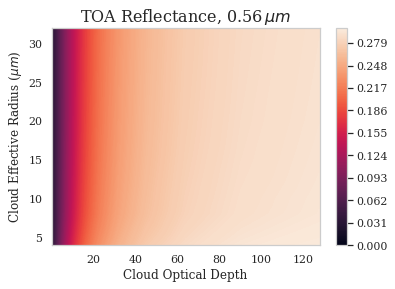

In [21]:
fig = plt.figure()

xi_TOA_v = np.arange(np.log10(4),np.log10(32),0.001)
yi_TOA_v = np.arange(np.log10(0.125),np.log10(128),0.001)
xi_TOA_v, yi_TOA_v = np.meshgrid(xi_TOA_v,yi_TOA_v)

zi_TOA_v = griddata((x_TOA_v,y_TOA_v),z_TOA_v,(xi_TOA_v,yi_TOA_v),method='linear')

# plot
plt.rc('font', family='serif')

fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(x_effr,y_effr,'k.')
plt.title('TOA Reflectance, 0.56$\,\mu m$', fontsize=16)
plt.ylabel('Cloud Effective Radius ($\mu m$)')
plt.xlabel('Cloud Optical Depth')

levels = np.linspace(0,0.3,301)

cntr1 = ax.contourf(10**yi_TOA_v, 10**xi_TOA_v, zi_TOA_v, levels=levels) # , cmap = 'plasma'

plt.ylim(4,32)
plt.xlim(0.125,128)
# plt.xscale('log')

plt.colorbar(cntr1)


fig.savefig('fig_TOA_v.png', bbox_inches='tight', dpi = 300)


#plt.show()

In [16]:
z_TOA_ir = dft_numpy[N_cloud]
for i in range(N_cloud-1):
    z_TOA_ir = np.concatenate([z_TOA_ir, dft_numpy[i+1+N_cloud]])


<Figure size 432x288 with 0 Axes>

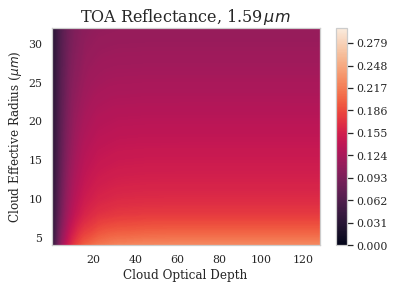

In [20]:
fig = plt.figure()

xi_TOA_v = np.arange(np.log10(4),np.log10(32),0.001)
yi_TOA_v = np.arange(np.log10(0.125),np.log10(128),0.001)
xi_TOA_v, yi_TOA_v = np.meshgrid(xi_TOA_v,yi_TOA_v)

zi_TOA_ir = griddata((x_TOA_v,y_TOA_v),z_TOA_ir,(xi_TOA_v,yi_TOA_v),method='linear')

# plot
plt.rc('font', family='serif')

fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(x_effr,y_effr,'k.')
plt.title('TOA Reflectance, 1.59$\,\mu m$', fontsize=16)
plt.ylabel('Cloud Effective Radius ($\mu m$)')
plt.xlabel('Cloud Optical Depth')
cntr1 = ax.contourf(10**yi_TOA_v, 10**xi_TOA_v, zi_TOA_ir, levels=levels) # , cmap = 'plasma'

plt.ylim(4,32)
plt.xlim(0.125,128)
# plt.xscale('log')

plt.colorbar(cntr1)

fig.savefig('fig_TOA_ir.png', bbox_inches='tight', dpi = 300)


# plt.show()